<a href="https://colab.research.google.com/github/bertrand12345/Extracting-Stock-Data/blob/main/Extracting_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Extracting Stock Data Using a Python Library</h1>

In [1]:

!pip install "lxml>=4.9
!pip install --upgrade beautifulsoup4
!pip install beautifulsoup4==4.11.2

!pip install lxml==4.6.4
!mamba install html5lib==1.1 -y
# !pip install requests==2.26.0

/bin/bash: -c: line 1: unexpected EOF while looking for matching `"'
/bin/bash: -c: line 2: syntax error: unexpected end of file
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.11.2
    Uninstalling beautifulsoup4-4.11.2:
      Successfully uninstalled beautifulsoup4-4.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.2.48 requires lxml>=4.9.1, but you have lxml 4.6.4 which is incompatible.
  Using cached beautifulsoup4-4.11.2-py3-none-any.whl.metadata (3.5 kB)
Using cached beautifulsoup4-4.11.2-py3-none-any.whl (129 kB)
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.12.3
    Uninstalling beautifulsoup4-4.12.3:
      Successfully unins

In [2]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

<h2 id="BSO">Beautiful Soup Objects</h2>

In [38]:
html="<!DOCTYPE html><html><head><title>Page Title</title></head><body><h3><b id='boldest'>Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body></html>"

In [39]:
soup = BeautifulSoup(html, "html.parser") #To parse a document, pass it into the BeautifulSoup constructor, the BeautifulSoup object.

In [41]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Page Title
  </title>
 </head>
 <body>
  <h3>
   <b id="boldest">
    Lebron James
   </b>
  </h3>
  <p>
   Salary: $ 92,000,000
  </p>
  <h3>
   Stephen Curry
  </h3>
  <p>
   Salary: $85,000, 000
  </p>
  <h3>
   Kevin Durant
  </h3>
  <p>
   Salary: $73,200, 000
  </p>
 </body>
</html>


we can see the tag type <code>bs4.element.Tag</code>

In [42]:
tag_object=soup.h3
tag_object

<h3><b id="boldest">Lebron James</b></h3>

In [43]:
tag_object

<h3><b id="boldest">Lebron James</b></h3>

## Tags

The <code>Tag</code> object corresponds to an HTML tag in the original document, for example, the tag title.

In [44]:
tag_object=soup.title
print("tag object:",tag_object)

tag object: <title>Page Title</title>


### Children, Parents, and Siblings

We can access the child of the tag or navigate down the branch as follows:


In [45]:
tag_child =tag_object.b
tag_child

We can access the parent with the <code> parent</code>

In [47]:
tag_object.parent

<head><title>Page Title</title></head>

<code>tag_object</code> sibling is the <code>paragraph</code> element

In [18]:
sibling_3 = sibling_2.next_sibling
sibling_3

<p> Salary: $85,000, 000 </p>

In [19]:
tag_child['id']

'boldest'

In [20]:
tag_child.attrs

{'id': 'boldest'}

### Navigable String

A string corresponds to a bit of text or content within a tag. Beautiful Soup uses the <code>NavigableString</code> class to contain this text. In our HTML we can obtain the name of the first player by extracting the sting of the <code>Tag</code> object <code>tag_child</code> as follows:

In [21]:
tag_string=tag_child.string
tag_string

'Lebron James'

we can verify the type is Navigable String

In [22]:
type(tag_string)

bs4.element.NavigableString

A NavigableString is just like a Python string or Unicode string, to be more precise. The main difference is that it also supports some  <code>BeautifulSoup</code> features. We can covert it to sting object in Python:

In [23]:
unicode_string = str(tag_string)
unicode_string

'Lebron James'

<h2 id="filter">Filter</h2>

Filters allow you to find complex patterns, the simplest filter is a string. In this section we will pass a string to a different filter method and Beautiful Soup will perform a match against that exact string.  Consider the following HTML of rocket launchs:

In [24]:
%%html
<table>
  <tr>
    <td id='flight' >Flight No</td>
    <td>Launch site</td>
    <td>Payload mass</td>
   </tr>
  <tr>
    <td>1</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a></td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a> </td>
    <td>80 kg</td>
  </tr>
</table>

Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg


We can store it as a string in the variable <code>table</code>:

In [49]:
table="<table><tr><td id='flight' >Flight No</td><td>Launch site</td><td>Payload mass</td></tr><tr><td>1</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a></td><td>300 kg</td></tr><tr><td>2</td><td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a> </td><td>80 kg</td></tr></table>"

In [50]:
table_bs = BeautifulSoup(table, "html.parser")

## find All

The <code>find_all()</code> method looks through a tag’s descendants and retrieves all descendants that match your filters.

<p>
The Method signature for <code>find_all(name, attrs, recursive, string, limit, **kwargs)<c/ode>
</p>

### Name

When we set the <code>name</code> parameter to a tag name, the method will extract all the tags with that name and its children.


In [51]:
table_rows=table_bs.find_all('tr')
table_rows

[<tr><td id="flight">Flight No</td><td>Launch site</td><td>Payload mass</td></tr>,
 <tr><td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td><td>300 kg</td></tr>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a> </td><td>80 kg</td></tr>]

The result is a Python Iterable just like a list, each element is a <code>tag</code> object:


In [52]:
first_row =table_rows[0]
first_row

<tr><td id="flight">Flight No</td><td>Launch site</td><td>Payload mass</td></tr>

The type is <code>tag</code>

In [53]:
print(type(first_row))

<class 'bs4.element.Tag'>


In [54]:
first_row.td

<td id="flight">Flight No</td>

If we iterate through the list, each element corresponds to a row in the table:

In [56]:
for i,row in enumerate(table_rows):
    print("row",i,"is",row)


row 0 is <tr><td id="flight">Flight No</td><td>Launch site</td><td>Payload mass</td></tr>
row 1 is <tr><td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td><td>300 kg</td></tr>
row 2 is <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>
row 3 is <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a> </td><td>80 kg</td></tr>


As <code>row</code> is a <code>cell</code> object, we can apply the method <code>find_all</code> to it and extract table cells in the object <code>cells</code> using the tag <code>td</code>, this is all the children with the name <code>td</code>. The result is a list, each element corresponds to a cell and is a <code>Tag</code> object, we can iterate through this list as well. We can extract the content using the <code>string</code>  attribute.

In [57]:
for i,row in enumerate(table_rows):
    print("row",i)
    cells=row.find_all('td')
    for j,cell in enumerate(cells):
        print('colunm',j,"cell",cell)

row 0
colunm 0 cell <td id="flight">Flight No</td>
colunm 1 cell <td>Launch site</td>
colunm 2 cell <td>Payload mass</td>
row 1
colunm 0 cell <td>1</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td>
colunm 2 cell <td>300 kg</td>
row 2
colunm 0 cell <td>2</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>
colunm 2 cell <td>94 kg</td>
row 3
colunm 0 cell <td>3</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a> </td>
colunm 2 cell <td>80 kg</td>


If we use a list we can match against any item in that list.

In [58]:
list_input=table_bs .find_all(name=["tr", "td"])
list_input

[<tr><td id="flight">Flight No</td><td>Launch site</td><td>Payload mass</td></tr>,
 <td id="flight">Flight No</td>,
 <td>Launch site</td>,
 <td>Payload mass</td>,
 <tr><td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td><td>300 kg</td></tr>,
 <td>1</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td>,
 <td>300 kg</td>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <td>2</td>,
 <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>,
 <td>94 kg</td>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a> </td><td>80 kg</td></tr>,
 <td>3</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a> </td>,
 <td>80 kg</td>]

## Attributes

If the argument is not recognized it will be turned into a filter on the tag’s attributes. For example the <code>id</code>  argument, Beautiful Soup will filter against each tag’s <code>id</code> attribute. For example, the first <code>td</code> elements have a value of <code>id</code> of <code>flight</code>, therefore we can filter based on that <code>id</code> value.

In [59]:
table_bs.find_all(id="flight")

[<td id="flight">Flight No</td>]

We can find all the elements that have links to the Florida Wikipedia page:

In [60]:
list_input=table_bs.find_all(href="https://en.wikipedia.org/wiki/Florida")
list_input

[<a href="https://en.wikipedia.org/wiki/Florida">Florida</a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida</a>]

If we set the  <code>href</code> attribute to True, regardless of what the value is, the code finds all tags with <code>href</code> value:

In [62]:
table_bs.find_all(href=True)

[<a href="https://en.wikipedia.org/wiki/Florida">Florida</a>,
 <a href="https://en.wikipedia.org/wiki/Texas">Texas</a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida</a>]

There are other methods for dealing with attributes and other related methods; Check out the following <a href='https://www.crummy.com/software/BeautifulSoup/bs4/doc/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01#css-selectors'>link</a>

<h3 id="exer_type">Exercise: <code>find_all</code></h3>

In [63]:
table_bs.find_all(href=False) #find all the elements without href value

[<table><tr><td id="flight">Flight No</td><td>Launch site</td><td>Payload mass</td></tr><tr><td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td><td>300 kg</td></tr><tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a> </td><td>80 kg</td></tr></table>,
 <tr><td id="flight">Flight No</td><td>Launch site</td><td>Payload mass</td></tr>,
 <td id="flight">Flight No</td>,
 <td>Launch site</td>,
 <td>Payload mass</td>,
 <tr><td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td><td>300 kg</td></tr>,
 <td>1</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td>,
 <td>300 kg</td>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <td>2</td>,
 <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>,
 <td>94 kg</td>,
 <tr><td>3</td><td><a href="https:

In [64]:
# Using the soup object soup, find the element with the id attribute content set to "boldest".

soup.find_all(id="boldest")

[<b id="boldest">Lebron James</b>]

### string

With string you can search for strings instead of tags, where we find all the elments with Florida:

In [65]:
table_bs.find_all(string="Florida")

['Florida', 'Florida']

## find

The <code>find_all()</code> method scans the entire document looking for results, it’s if you are looking for one element you can use the <code>find()</code> method to find the first element in the document. Consider the following two table:

In [66]:
%%html
<h3>Rocket Launch </h3>

<p>
<table class='rocket'>
  <tr>
    <td>Flight No</td>
    <td>Launch site</td>
    <td>Payload mass</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Florida</td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Texas</td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Florida </td>
    <td>80 kg</td>
  </tr>
</table>
</p>
<p>

<h3>Pizza Party  </h3>


<table class='pizza'>
  <tr>
    <td>Pizza Place</td>
    <td>Orders</td>
    <td>Slices </td>
   </tr>
  <tr>
    <td>Domino's Pizza</td>
    <td>10</td>
    <td>100</td>
  </tr>
  <tr>
    <td>Little Caesars</td>
    <td>12</td>
    <td >144 </td>
  </tr>
  <tr>
    <td>Papa John's </td>
    <td>15 </td>
    <td>165</td>
  </tr>


Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg
Pizza Place,Orders,Slices
Domino's Pizza,10,100
Little Caesars,12,144
Papa John's,15,165


We store the HTML as a Python string and assign <code>two_tables</code>:


In [69]:
two_tables="<h3>Rocket Launch </h3><p><table class='rocket'><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table></p><p><h3>Pizza Party  </h3><table class='pizza'><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td >144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr>"

In [70]:
two_tables_bs= BeautifulSoup(two_tables, 'html.parser')

We can find the first table using the tag name table

In [71]:
two_tables_bs.find("table")

<table class="rocket"><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table>

We can filter on the class attribute to find the second table, but because class is a keyword in Python, we add an underscore.

In [72]:
two_tables_bs.find("table",class_='pizza')

<table class="pizza"><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td>144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr></table>

<h2 id="DSCW">Downloading And Scraping The Contents Of A Web Page</h2>

We Download the contents of the web page:

In [73]:
url = "http://www.ibm.com"

We use <code>get</code> to download the contents of the webpage in text format and store in a variable called <code>data</code>:

In [74]:
data  = requests.get(url).text

We create a <code>BeautifulSoup</code> object using the <code>BeautifulSoup</code> constructor

In [75]:
soup = BeautifulSoup(data,"html.parser")  # create a soup object using the variable 'data'

Scrape all links

In [76]:
for link in soup.find_all('a',href=True):  # in html anchor/link is represented by the tag <a>

    print(link.get('href'))

https://www.ibm.com/granite?lnk=dev
https://developer.ibm.com/technologies/artificial-intelligence?lnk=dev
https://www.ibm.com/products/watsonx-code-assistant?lnk=dev
https://www.ibm.com/watsonx/developer/?lnk=dev
https://www.ibm.com/thought-leadership/institute-business-value/report/ceo-generative-ai?lnk=bus
https://www.ibm.com/think/reports/ai-in-action?lnk=bus
https://www.ibm.com/products/watsonx-orchestrate/ai-agent-for-hr?lnk=bus
https://www.ibm.com/products/guardium-data-security-center?lnk=bus
https://www.ibm.com/artificial-intelligence?lnk=ProdC
https://www.ibm.com/hybrid-cloud?lnk=ProdC
https://www.ibm.com/consulting?lnk=ProdC


## Scrape  all images  Tags

In [77]:
for link in soup.find_all('img'):# in html image is represented by the tag <img>
    print(link)
    print(link.get('src'))

## Scrape data from HTML tables

In [107]:
#The below url contains an html table with data about colors and color codes.
import pandas as pd
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/HTMLColorCodes.html"

Before proceeding to scrape a web site, you need to examine the contents, and the way data is organized on the website. Open the above url in your browser and check how many rows and columns are there in the color table.

In [108]:
# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text

In [110]:
soup = BeautifulSoup(data,"html.parser")

In [111]:
#find a html table in the web page
table = soup.find('table') # in html table is represented by the tag <table>

In [112]:
#Get all rows from the table
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    color_name = cols[2].string # store the value in column 3 as color_name
    color_code = cols[3].string # store the value in column 4 as color_code
    print("{}--->{}".format(color_name,color_code))

Color Name--->None
lightsalmon--->#FFA07A
salmon--->#FA8072
darksalmon--->#E9967A
lightcoral--->#F08080
coral--->#FF7F50
tomato--->#FF6347
orangered--->#FF4500
gold--->#FFD700
orange--->#FFA500
darkorange--->#FF8C00
lightyellow--->#FFFFE0
lemonchiffon--->#FFFACD
papayawhip--->#FFEFD5
moccasin--->#FFE4B5
peachpuff--->#FFDAB9
palegoldenrod--->#EEE8AA
khaki--->#F0E68C
darkkhaki--->#BDB76B
yellow--->#FFFF00
lawngreen--->#7CFC00
chartreuse--->#7FFF00
limegreen--->#32CD32
lime--->#00FF00
forestgreen--->#228B22
green--->#008000
powderblue--->#B0E0E6
lightblue--->#ADD8E6
lightskyblue--->#87CEFA
skyblue--->#87CEEB
deepskyblue--->#00BFFF
lightsteelblue--->#B0C4DE
dodgerblue--->#1E90FF


## Scrape data from HTML tables into a DataFrame using BeautifulSoup and Pandas

In [5]:
import pandas as pd

In [6]:
#The below url contains html tables with data about world population.
url = "https://en.wikipedia.org/wiki/World_population"

Before proceeding to scrape a web site, you need to examine the contents, and the way data is organized on the website. Open the above url in your browser and check the tables on the webpage.

In [7]:
# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text

In [8]:
soup = BeautifulSoup(data,"html.parser")

In [9]:
#find all html tables in the web page
tables = soup.find_all('table') # in html table is represented by the tag <table>

In [10]:
# we can see how many tables were found by checking the length of the tables list
len(tables)

31

Assume that we are looking for the `10 most densly populated countries` table, we can look through the tables list and find the right one we are look for based on the data in each table or we can search for the table name if it is in the table but this option might not always work.

In [11]:
for index,table in enumerate(tables):
    if ("10 most densely populated countries" in str(table)):
        table_index = index
print(table_index)

8


We can locate the table name of the table, `10 most densly populated countries`, below.

In [12]:
print(tables[table_index].prettify())

<table class="wikitable sortable" style="text-align:right">
 <caption>
  10 most densely populated countries
  <small>
   (with population above 5 million)
  </small>
  <sup class="reference" id="cite_ref-:10_104-0">
   <a href="#cite_note-:10-104">
    <span class="cite-bracket">
     [
    </span>
    99
    <span class="cite-bracket">
     ]
    </span>
   </a>
  </sup>
 </caption>
 <tbody>
  <tr>
   <th scope="col">
    Rank
   </th>
   <th scope="col">
    Country
   </th>
   <th scope="col">
    Population
   </th>
   <th scope="col">
    Area
    <br/>
    <small>
     (km
     <sup>
      2
     </sup>
     )
    </small>
   </th>
   <th scope="col">
    Density
    <br/>
    <small>
     (pop/km
     <sup>
      2
     </sup>
     )
    </small>
   </th>
  </tr>
  <tr>
   <td>
    1
   </td>
   <td align="left">
    <span class="flagicon">
     <span class="mw-image-border" typeof="mw:File">
      <span>
       <img alt="" class="mw-file-element" data-file-height="600" data-fi

In [13]:
import pandas as pd

# Create a list to store the data
data = []

# Check if the table exists at the given index
if table_index < len(tables):
    for row in tables[table_index].tbody.find_all("tr"):
        col = row.find_all("td")
        # Check if the row contains at least 5 columns
        if len(col) >= 5:
            rank = col[0].text.strip()
            country = col[1].text.strip()
            population = col[2].text.strip()
            area = col[3].text.strip()
            density = col[4].text.strip()

            # Append the data as a dictionary to the list
            data.append({
                "Rank": rank,
                "Country": country,
                "Population": population,
                "Area": area,
                "Density": density
            })

# Create a DataFrame from the list of dictionaries
population_data = pd.DataFrame(data, columns=["Rank", "Country", "Population", "Area", "Density"])

population_data


,Rank,Country,Population,Area,Density
0,1,Singapore,"5,921,231",719,"8,235"
1,2,Bangladesh,"165,650,475","148,460","1,116"
2,3,Palestine[note 3][100],"5,223,000","6,025",867
3,4,Taiwan[note 4],"23,580,712","35,980",655
4,5,South Korea,"51,844,834","99,720",520
5,6,Lebanon,"5,296,814","10,400",509
6,7,Rwanda,"13,173,730","26,338",500
7,8,Burundi,"12,696,478","27,830",456
8,9,Israel,"9,402,617","21,937",429
9,10,India,"1,389,637,446","3,287,263",423


## Scrape data from HTML tables into a DataFrame using BeautifulSoup and read_html

Using the same `url`, `data`, `soup`, and `tables` object as in the last section we can use the `read_html` function to create a DataFrame.

Remember the table we need is located in `tables[table_index]`

We can now use the `pandas` function `read_html` and give it the string version of the table as well as the `flavor` which is the parsing engine `bs4`.


The function `read_html` always returns a list of DataFrames so we must pick the one we want out of the list.

In [14]:

import bs4
print(bs4.__version__)
import pandas as pd


from io import StringIO
import pandas as pd

# Convertir le tableau HTML en une chaîne de caractères
html_content = str(tables[5])

# Envelopper cette chaîne dans un objet StringIO
html_io = StringIO(html_content)

# Passer l'objet StringIO à pd.read_html()
population_data_read_html = pd.read_html(html_io, flavor='bs4')[0]

population_data_read_html


4.11.2


,Country / Dependency,Population,% of world,Date,Source (official or from the United Nations)
0,India,1425775850,17.5%,14 Apr 2023,UN projection[89]
1,China,1409670000,17.3%,17 Jan 2024,National annual estimate[90]
2,United States,337119148,4.14%,4 Nov 2024,National population clock[91]
3,Indonesia,278696200,3.42%,1 Jul 2023,National annual estimate[92]
4,Pakistan,229488994,2.82%,1 Jul 2022,UN projection[93]
5,Nigeria,216746934,2.66%,1 Jul 2022,UN projection[93]
6,Brazil,218375497,2.68%,4 Nov 2024,National population clock[94]
7,Bangladesh,168220000,2.07%,1 Jul 2020,Annual Population Estimate[95]
8,Russia,147190000,1.81%,1 Oct 2021,2021 preliminary census results[96]
9,Mexico,128271248,1.58%,31 Mar 2022,NaN


## Scrape data from HTML tables into a DataFrame using read_html

We can also use the `read_html` function to directly get DataFrames from a `url`

In [15]:
dataframe_list = pd.read_html(url, flavor='bs4')

We can see there are 25 DataFrames just like when we used `find_all` on the `soup` object.

In [16]:
len(dataframe_list)

28

Finally we can pick the DataFrame we need out of the list.


In [17]:
dataframe_list[5]

,Country / Dependency,Population,% of world,Date,Source (official or from the United Nations)
0,India,1425775850,17.5%,14 Apr 2023,UN projection[89]
1,China,1409670000,17.3%,17 Jan 2024,National annual estimate[90]
2,United States,337119148,4.14%,4 Nov 2024,National population clock[91]
3,Indonesia,278696200,3.42%,1 Jul 2023,National annual estimate[92]
4,Pakistan,229488994,2.82%,1 Jul 2022,UN projection[93]
5,Nigeria,216746934,2.66%,1 Jul 2022,UN projection[93]
6,Brazil,218375497,2.68%,4 Nov 2024,National population clock[94]
7,Bangladesh,168220000,2.07%,1 Jul 2020,Annual Population Estimate[95]
8,Russia,147190000,1.81%,1 Oct 2021,2021 preliminary census results[96]
9,Mexico,128271248,1.58%,31 Mar 2022,NaN


We can also use the `match` parameter to select the specific table we want. If the table contains a string matching the text it will be read.

In [18]:
pd.read_html(url, match="10 most densely populated countries", flavor='bs4')[0]

,Rank,Country,Population,Area (km2),Density (pop/km2)
0,1,Singapore,5921231,719,8235
1,2,Bangladesh,165650475,148460,1116
2,3,Palestine[note 3][100],5223000,6025,867
3,4,Taiwan[note 4],23580712,35980,655
4,5,South Korea,51844834,99720,520
5,6,Lebanon,5296814,10400,509
6,7,Rwanda,13173730,26338,500
7,8,Burundi,12696478,27830,456
8,9,Israel,9402617,21937,429
9,10,India,1389637446,3287263,423


A company's stock share is a piece of the company more precisely:
<p><b>A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This
entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares." </p></b>



In [ ]:
import yfinance as yf
import pandas as pd

## Using the yfinance Library to Extract Stock Data

Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.

In [ ]:
apple = yf.Ticker("AAPL")

Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here https://aroussi.com/post/python-yahoo-finance.

In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

--2024-11-05 18:40:37--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5699 (5.6K) [application/json]
Saving to: ‘apple.json’

apple.json          100%[===================>]   5.57K  --.-KB/s    in 0s      

2024-11-05 18:40:38 (840 MB/s) - ‘apple.json’ saved [5699/5699]



Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary.

In [ ]:
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    #Print the type of data variable
    #print("Type:", type(apple_info))
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

We can get the <code>'country'</code> using the key country

In [ ]:
apple_info['country']

'United States'

### Extracting Share Price

A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.

In [ ]:
apple_share_price_data = apple.history(period="max")

The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.

In [ ]:
apple_share_price_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
11062,2024-10-30 00:00:00-04:00,232.610001,233.470001,229.550003,230.100006,47070900,0.0,0.0
11063,2024-10-31 00:00:00-04:00,229.339996,229.830002,225.369995,225.910004,64370100,0.0,0.0
11064,2024-11-01 00:00:00-04:00,220.970001,225.350006,220.270004,222.910004,65276700,0.0,0.0
11065,2024-11-04 00:00:00-05:00,220.990005,222.789993,219.710007,222.009995,44903300,0.0,0.0
11066,2024-11-05 00:00:00-05:00,221.794998,223.945007,221.794998,223.020004,16037322,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.

In [ ]:
apple_share_price_data.reset_index(inplace=True)

We can plot the `Open` price against the `Date`:

<Axes: xlabel='Date'>

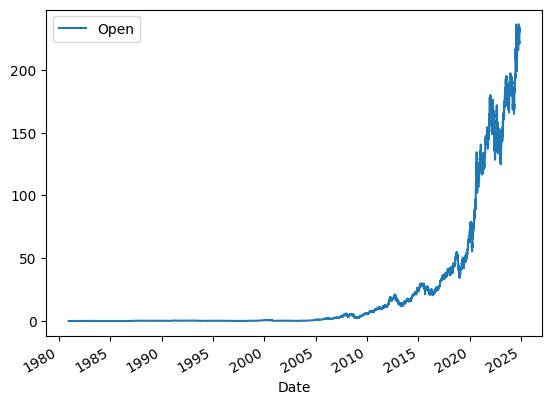

In [ ]:
apple_share_price_data.plot(x="Date", y="Open")

### Extracting Dividends

Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.


In [ ]:
apple.dividends

,Dividends
Date,
1987-05-11 00:00:00-04:00,0.000536
1987-08-10 00:00:00-04:00,0.000536
1987-11-17 00:00:00-05:00,0.000714
1988-02-12 00:00:00-05:00,0.000714
1988-05-16 00:00:00-04:00,0.000714
...,...
2023-08-11 00:00:00-04:00,0.240000
2023-11-10 00:00:00-05:00,0.240000
2024-02-09 00:00:00-05:00,0.240000


We can plot the dividends overtime:

<Axes: xlabel='Date'>

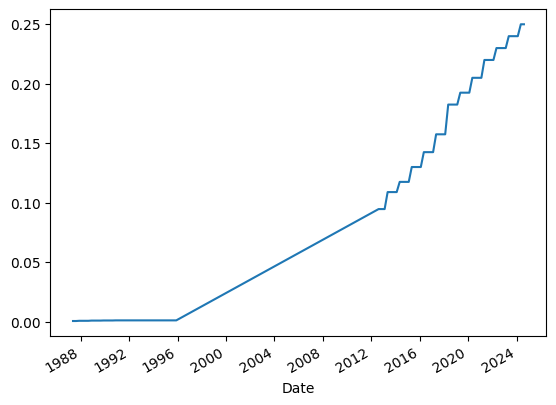

In [ ]:
apple.dividends.plot()

Now using the `Ticker` module create an object for AMD (Advanced Micro Devices) with the ticker symbol is `AMD` called; name the object <code>amd</code>.

In [ ]:
amd = yf.Ticker("AMD")

In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json

--2024-11-05 19:23:37--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5838 (5.7K) [application/json]
Saving to: ‘amd.json’

amd.json            100%[===================>]   5.70K  --.-KB/s    in 0s      

2024-11-05 19:23:38 (1.13 GB/s) - ‘amd.json’ saved [5838/5838]



In [ ]:
import json
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    # Print the type of data variable
    #print("Type:", type(apple_info))
amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

Use the key  <code>'country'</code> to find the country the stock belongs to.

In [ ]:
amd_info['country']

'United States'

Use the key  <code>'sector'</code> to find the sector the stock belongs to

In [ ]:
amd_info['sector']

'Technology'

Obtain stock data for AMD using the `history` function, set the `period` to max. Find the `Volume` traded on the first day

In [ ]:
amd_price = amd.history(period="max")
amd_price.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,0.0,3.302083,3.125000,3.145833,219600,0.0,0.0
1980-03-18 00:00:00-05:00,0.0,3.125000,2.937500,3.031250,727200,0.0,0.0
1980-03-19 00:00:00-05:00,0.0,3.083333,3.020833,3.041667,295200,0.0,0.0
1980-03-20 00:00:00-05:00,0.0,3.062500,3.010417,3.010417,159600,0.0,0.0
1980-03-21 00:00:00-05:00,0.0,3.020833,2.906250,2.916667,130800,0.0,0.0


<h1>Extracting and Visualizing Stock Data2</h1>



In [ ]:
!pip install bs4
!pip install nbformat

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Extract Stock Data

In [ ]:
Data = yf.Ticker("TSLA")

In [ ]:
tesla_data = Data.history(period="max")
tesla_data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-30 00:00:00-04:00,258.040009,263.350006,255.820007,257.549988,53993600,0.0,0.0
2024-10-31 00:00:00-04:00,257.989990,259.750000,249.250000,249.850006,66575300,0.0,0.0
2024-11-01 00:00:00-04:00,252.039993,254.000000,246.630005,248.979996,57544800,0.0,0.0
2024-11-04 00:00:00-05:00,244.559998,248.899994,238.880005,242.839996,68802400,0.0,0.0
2024-11-05 00:00:00-05:00,247.339996,255.279999,246.210007,251.440002,66787000,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function.

In [ ]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Use Webscraping to Extract Tesla Revenue Data

The `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.

In [ ]:
df = []
payload = {"Date": [], "Revenue": []}
r = requests.get(URL, payload)
soup = BeautifulSoup(r.text, 'html.parser')


In [ ]:
import pandas as pd

# Create an empty DataFrame with columns 'Date' and 'Revenue'
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])



In [ ]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage containing the Tesla revenue table
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Make a GET request to fetch the page content
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')


In [ ]:
# Find the table with a specific class or id
table = soup.find('table', {'class': 'quarterly-revenue-table'})


In [ ]:
# Get all rows in the table (skip the header row)
rows = soup.find_all('tr')[1:]  # Skip the first row which is the header


In [ ]:
# Get all rows in the table (skip the header row)
#rows = table.find_all('tr')[1]  # Skip the first row which is the header

rows = soup.find_all("tbody")[1]


In [ ]:
# Loop through each row to extract the data
for row in rows:
    # Extract all columns (td elements) in the row
    cols = row.find_all('td')

    # If the row has at least 2 columns, extract Date and Revenue
    if len(cols) >= 2:
        date = cols[0].text.strip()  # Date is in the first column
        revenue = cols[1].text.strip()  # Revenue is in the second column

        # Append the extracted data to the DataFrame
        tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)


TypeError: object of type 'int' has no len()